In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
data_url1 = 'https://www.dol.gov/sites/dolgov/files/ETA/oflc/pdfs/PERM_Disclosure_Data_FY2023_Q4.xlsx'
data_url2 = 'https://www.dol.gov/sites/dolgov/files/ETA/oflc/pdfs/PERM_Disclosure_Data_FY2022_Q4.xlsx'
df = pd.concat([pd.read_excel(data_url2), pd.read_excel(data_url1)])

In [3]:
# Get a visualisation of count of case per decision date month
df['DECISION_DATE_MONTH'] = df['DECISION_DATE'].dt.to_period('M')
df['DECISION_DATE_YEAR'] = df['DECISION_DATE'].dt.to_period('Y')
df

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,REFILE,ORIG_FILE_DATE,PREVIOUS_SWA_CASE_NUMBER_STATE,SCHD_A_SHEEPHERDER,EMPLOYER_NAME,EMPLOYER_ADDRESS_1,...,EMPLOYER_COMPLETED_APPLICATION,PREPARER_NAME,PREPARER_TITLE,PREPARER_EMAIL,EMP_INFO_DECL_NAME,EMP_DECL_TITLE,EMPLOYER_YEAR_COMMENCED_BUSINESS,FOREIGN_WORKER_LIVE_IN_DOM_SVC_CNT,DECISION_DATE_MONTH,DECISION_DATE_YEAR
0,A-20345-31895,Certified-Expired,2021-04-22,2021-10-01,N,NaT,NaN,N,VIGO INDUSTRIES,"VIGO INDUSTRIES, LLC",...,N,Hui Zeng,Attorney,hui@zenglawgroup.com,Spresime Bekteshi,HR Manager,NaN,NaN,2021-10,2021
1,A-21068-59828,Certified-Expired,2021-04-20,2021-10-01,N,NaT,NaN,N,VESUVIUS USA CORPORATION,1404 NEWTON DRIVE,...,N,Frances P Rayer,Member,frayer@cozen.com,Tricia Rosenberger,Sr. Regional HR Manager NAFTA,NaN,NaN,2021-10,2021
2,A-20318-20833,Certified-Expired,2020-11-16,2021-10-01,N,NaT,NaN,N,Kikkerland Design Inc,666 Broadway 4th Floor,...,N,PETER T JENSEN,ATTORNEY,PTJENSEN@JENSENLAW.COM,LOREN S ROWER,CFO,NaN,NaN,2021-10,2021
3,A-21083-65884,Certified-Expired,2021-04-16,2021-10-01,N,NaT,NaN,N,yalai inc,3 Old Concord Rd,...,N,Ge Lei,Attorney,linda.lei@getechlaw.com,Huiqing Chen,President,NaN,NaN,2021-10,2021
4,A-21098-71922,Certified-Expired,2021-04-13,2021-10-01,N,NaT,NaN,N,VIACOMCBS INC.,680 FOLSOM STREET,...,N,Laura F Reiff,Attorney,ReiffL@gtlaw.com,Kimberly Wong,Senior Human Resources Specialist,NaN,NaN,2021-10,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116422,A-23144-46945,Withdrawn,2023-05-24,2023-09-29,N,NaT,NaN,N,WL Nails Inc,7122 Market St,...,N,Tan Bui,Lawyer,tanbui.13192@gmail.com,Haily Nguyen,Owner,2015.0,NaN,2023-09,2023
116423,A-23144-46992,Withdrawn,2023-05-24,2023-09-29,N,NaT,NaN,N,WL Nails Inc,7122 Market St,...,N,Tan Bui,Lawyer,tanbui.13192@gmail.com,Haily Nguyen,Owner,2015.0,NaN,2023-09,2023
116424,A-23144-46995,Withdrawn,2023-05-24,2023-09-29,N,NaT,NaN,N,WL Nails Inc,7122 Market St,...,N,Tan Bui,Lawyer,tanbui.13192@gmail.com,Haily Nguyen,Owner,2015.0,NaN,2023-09,2023
116425,A-23144-46997,Withdrawn,2023-05-24,2023-09-29,N,NaT,NaN,N,WL Nails Inc,7122 Market St,...,N,Tan Bui,Lawyer,tanbui.13192@gmail.com,Haily Nguyen,Owner,2015.0,NaN,2023-09,2023


In [4]:
# Get the count of decisions per DECISION_DATE_MONTH
df2 = df.groupby(['DECISION_DATE_MONTH'])['CASE_STATUS'].count()
df2

DECISION_DATE_MONTH
2021-10     8293
2021-11     9569
2021-12     9807
2022-01     9958
2022-02     9210
2022-03    10516
2022-04     9187
2022-05    10037
2022-06     6735
2022-07     5846
2022-08     7827
2022-09     7615
2022-10     7347
2022-11     7965
2022-12    10595
2023-01    11141
2023-02     8516
2023-03    11074
2023-04     9302
2023-05    11126
2023-06     9036
2023-07     9313
2023-08    11258
2023-09     9754
Freq: M, Name: CASE_STATUS, dtype: int64

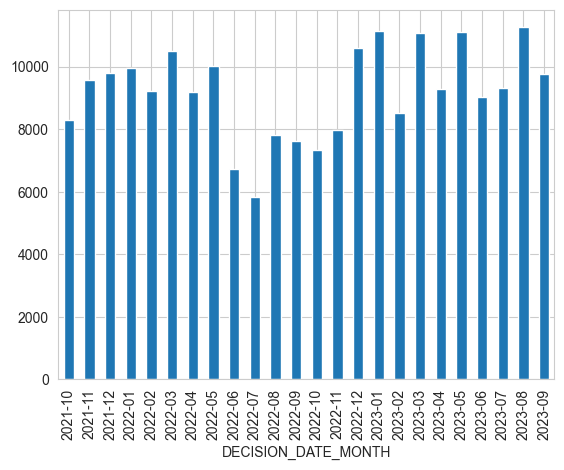

In [5]:
# Plot the Cases status per decision date month
ax = df2.plot(kind="bar")

In [6]:
df2_shift = df2.shift(1)
df2_shift

DECISION_DATE_MONTH
2021-10        NaN
2021-11     8293.0
2021-12     9569.0
2022-01     9807.0
2022-02     9958.0
2022-03     9210.0
2022-04    10516.0
2022-05     9187.0
2022-06    10037.0
2022-07     6735.0
2022-08     5846.0
2022-09     7827.0
2022-10     7615.0
2022-11     7347.0
2022-12     7965.0
2023-01    10595.0
2023-02    11141.0
2023-03     8516.0
2023-04    11074.0
2023-05     9302.0
2023-06    11126.0
2023-07     9036.0
2023-08     9313.0
2023-09    11258.0
Freq: M, Name: CASE_STATUS, dtype: float64

In [7]:

df2_shift = df2*0.5 + df2_shift*0.5
df2_shift

DECISION_DATE_MONTH
2021-10        NaN
2021-11     8931.0
2021-12     9688.0
2022-01     9882.5
2022-02     9584.0
2022-03     9863.0
2022-04     9851.5
2022-05     9612.0
2022-06     8386.0
2022-07     6290.5
2022-08     6836.5
2022-09     7721.0
2022-10     7481.0
2022-11     7656.0
2022-12     9280.0
2023-01    10868.0
2023-02     9828.5
2023-03     9795.0
2023-04    10188.0
2023-05    10214.0
2023-06    10081.0
2023-07     9174.5
2023-08    10285.5
2023-09    10506.0
Freq: M, Name: CASE_STATUS, dtype: float64

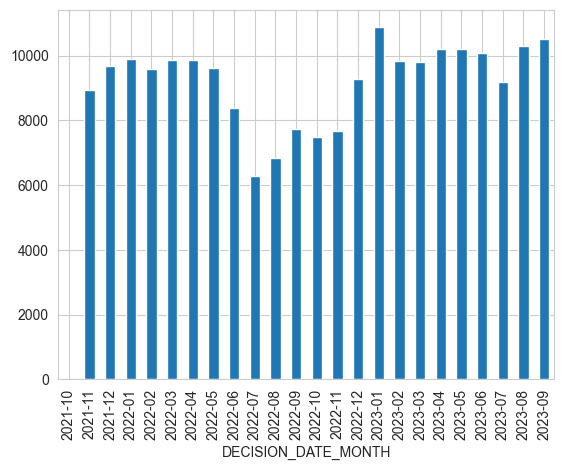

In [8]:
ax = df2_shift.plot(kind="bar")

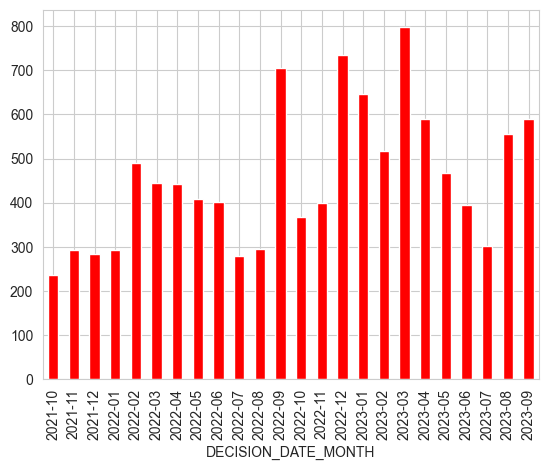

In [9]:
# Get the denial rate per DECISION_DATE_MONTH

df3 = df[df['CASE_STATUS'] == 'Denied']
df3 = df3.groupby(['DECISION_DATE_MONTH'])['CASE_STATUS'].count()
# Plot the denial in red
ax = df3.plot(kind="bar", color='red')

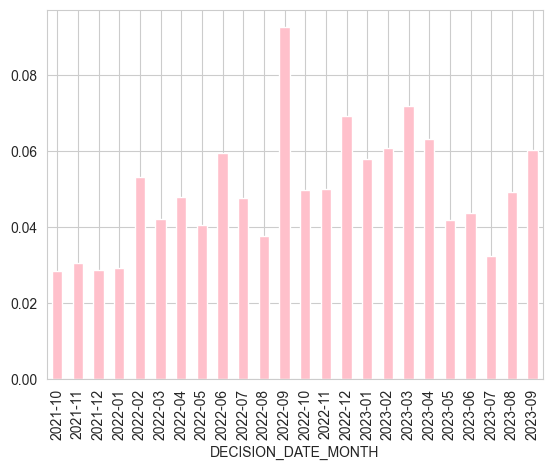

In [12]:
df_denial_rate = df3/df2
ax = df_denial_rate.plot(kind="bar", color='pink')